In [192]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import numpy as np
from shapely.geometry import mapping
import os

In [193]:
sentinal_fp = "newdata/S2B/GRANULE/L2A_T29UNV_A024602_20211121T114444/IMG_DATA/R10m/band/"
# find every file in the sentinal_fp directory
sentinal_band_paths = [os.path.join(sentinal_fp, f) 
                       for f in os.listdir(sentinal_fp) if os.path.isfile(os.path.join(sentinal_fp, f))]
sentinal_band_paths.sort()
sentinal_band_paths

['newdata/S2B/GRANULE/L2A_T29UNV_A024602_20211121T114444/IMG_DATA/R10m/band/02.tiff',
 'newdata/S2B/GRANULE/L2A_T29UNV_A024602_20211121T114444/IMG_DATA/R10m/band/03.tiff',
 'newdata/S2B/GRANULE/L2A_T29UNV_A024602_20211121T114444/IMG_DATA/R10m/band/04.tiff',
 'newdata/S2B/GRANULE/L2A_T29UNV_A024602_20211121T114444/IMG_DATA/R10m/band/08.tiff']

In [194]:
# create a products directory within the data dir which won't be uploaded to Github
img_dir = 'data/products/'

# check to see if the dir it exists, if not, create it
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

# filepath for image we're writing out
img_fp = img_dir + 'sentinel_bands.tif'

# Read metadata of first file and assume all other bands are the same
with rasterio.open(sentinal_band_paths[0]) as src0:
    meta = src0.meta

# Update metadata to reflect the number of layers
meta.update(count = len(sentinal_band_paths))

# Read each layer and write it to stack
with rasterio.open(img_fp, 'w', **meta) as dst:
    for id, layer in enumerate(sentinal_band_paths, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

In [151]:
full_dataset = rasterio.open(img_fp)
img_rows, img_cols = full_dataset.shape
img_bands = full_dataset.count
print(full_dataset.shape) # dimensions
print(full_dataset.count) # bands

(10980, 10980)
4


(3, 1200, 1200)


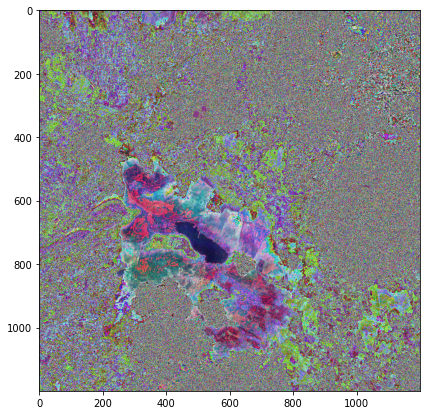

<AxesSubplot:>

In [152]:
import matplotlib.pyplot as plt
from rasterio.plot import show

clipped_img = full_dataset.read([4,3,2])[:, 0:1200, 0:1200]
print(clipped_img.shape)
fig, ax = plt.subplots(figsize=(10,7))
show(np.uint8(clipped_img))


In [153]:
full_dataset.crs

CRS.from_epsg(32629)

In [154]:
shapefile = gpd.read_file('newdata/Shapefiles/test.shp')
shapefile.crs


<Derived Projected CRS: EPSG:32629>
Name: WGS 84 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°W and 6°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Côte D'Ivoire (Ivory Coast). Faroe Islands. Guinea. Ireland. Jan Mayen. Mali. Mauritania. Morocco. Portugal. Sierra Leone. Spain. United Kingdom (UK). Western Sahara.
- bounds: (-12.0, 0.0, -6.0, 84.0)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [155]:
shapefile = shapefile.to_crs({'init': 'epsg:32629'})

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [156]:
shapefile.crs

<Derived Projected CRS: EPSG:32629>
Name: WGS 84 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°W and 6°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Côte D'Ivoire (Ivory Coast). Faroe Islands. Guinea. Ireland. Jan Mayen. Mali. Mauritania. Morocco. Portugal. Sierra Leone. Spain. United Kingdom (UK). Western Sahara.
- bounds: (-12.0, 0.0, -6.0, 84.0)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [157]:
len(shapefile)

126

In [158]:
shapefile

,OBJECTID,SEG_CD,NAME,AREA_,HECTARE,PERIMETER,HYDRO_AR,ORDER_,OS_LAYER,SOURCE,LWB,EDENLakeCo,Shape_STAr,Shape_STLe,geometry
0,9196,26_750b,Killinure Lough,2.550,256.032943,14962.521332,26,6.0,LAKE,epa,Y,260155a0180,2.560329e+06,14962.521332,"POLYGON ((571243.623 5924578.353, 571335.441 5..."
1,9197,26_750d,Killinure L,0.210,21.053440,2789.195012,26,6.0,LAKE,epa,Y,260155a0322,2.105344e+05,2789.195012,"POLYGON ((573396.924 5923436.198, 573408.598 5..."
2,10422,25_264,None,0.001,0.123002,244.559615,25,-99.0,POND,epa,N,None,1.230019e+03,244.559615,"POLYGON ((583963.935 5917361.393, 583957.191 5..."
3,10423,25_265,None,0.001,0.069620,104.507325,25,-99.0,POND,epa,N,None,6.962000e+02,104.507325,"POLYGON ((584425.096 5916728.063, 584414.201 5..."
4,11930,26_77,None,0.001,0.062219,90.575159,26,-99.0,POND,epa,N,260155a0500,6.221906e+02,90.575159,"POLYGON ((550495.219 5939922.499, 550497.751 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,8831,26_498,Ross Lough,0.203,20.348064,2416.288689,26,2.0,LAKE,epa,Y,260155a0310,2.034806e+05,2416.288689,"POLYGON ((572366.385 5929532.300, 572360.135 5..."
122,8844,26_511,Creggan Lough,0.437,43.837426,2610.975555,26,2.0,LAKE,epa,Y,260155a0350,4.383743e+05,2610.975555,"POLYGON ((573366.099 5930434.733, 573364.913 5..."
123,8846,26_513,Nacreeva ( Lough ),0.007,0.667048,381.871742,26,1.0,LAKE,epa,N,None,6.670479e+03,381.871742,"POLYGON ((551974.862 5918802.801, 551979.787 5..."
124,9187,26_750a,Ree ( Lough ),99.802,10020.397261,192208.037200,26,6.0,LAKE,epa,Y,260155a0670,1.002040e+08,192208.037200,"POLYGON ((572270.223 5931471.130, 572255.513 5..."


In [159]:
# this generates a list of shapely geometries
geoms = shapefile.geometry.values 

# let's grab a single shapely geometry to check
geometry = geoms[0] 
print(type(geometry))
print(geometry)

# transform to GeoJSON format
from shapely.geometry import mapping
feature = [mapping(geometry)] # can also do this using polygon.__geo_interface__
print(type(feature))
print(feature)

<class 'shapely.geometry.polygon.Polygon'>
POLYGON ((571243.6233923424 5924578.353057174, 571335.4410910567 5924620.894131219, 571335.5246003448 5924596.098796401, 571355.7562959474 5924573.466506999, 571389.124260565 5924560.186806557, 571402.7365245804 5924559.757274972, 571407.0813217314 5924547.480333488, 571413.4549052273 5924541.060887974, 571420.678613845 5924540.451702376, 571424.5540572116 5924544.566102871, 571414.2907186036 5924564.978479616, 571456.8038614807 5924596.949433361, 571452.1027082275 5924604.122237404, 571470.8530344183 5924616.542797046, 571469.3746655905 5924626.700904081, 571474.1914163204 5924629.537593422, 571485.9049316591 5924611.054782262, 571514.4295418322 5924610.344984168, 571522.9805456875 5924615.683786282, 571524.0596295989 5924623.417753616, 571521.4579963365 5924627.240698173, 571490.8011141857 5924622.391496989, 571479.3221530902 5924639.478173233, 571493.8288064266 5924649.879840832, 571485.6140165171 5924657.653445034, 571474.1798231049 592464

In [160]:
out_image, out_transform = mask(full_dataset, feature, crop=True)
out_image.shape

(4, 215, 306)

In [161]:
full_dataset.close()

In [167]:
X = np.array([], dtype=np.int8).reshape(0,4) # pixels for training
y = np.array([], dtype=np.string_) # labels for training

# extract the raster values within the polygon 
with rasterio.open(img_fp) as src:
    band_count = src.count
    for index, geom in enumerate(geoms):
        feature = [mapping(geom)]

        # the mask function returns an array of the raster pixels within this feature
        out_image, out_transform = mask(src, feature, crop=True) 
        # eliminate all the pixels with 0 values for all 4 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image[:,~np.all(out_image == 0, axis=0)]
        # eliminate all the pixels with 255 values for all 8 bands - AKA not actually part of the shapefile
        out_image_trimmed = out_image_trimmed[:,~np.all(out_image_trimmed == 255, axis=0)]
        # reshape the array to [pixel count, bands]
        out_image_reshaped = out_image_trimmed.reshape(-1, band_count)
        # append the labels to the y array
        y = np.append(y,[shapefile["OS_LAYER"][index]] * out_image_reshaped.shape[0]) 
        # stack the pizels onto the pixel array
        X = np.vstack((X,out_image_reshaped))     

In [168]:
# What are our classification labels?
labels = np.unique(shapefile["OS_LAYER"])
print('The training data include {n} classes: {classes}\n'.format(n=labels.size, 
                                                                classes=labels))

# We will need a "X" matrix containing our features, and a "y" array containing our labels
print('Our X matrix is sized: {sz}'.format(sz=X.shape))
print('Our y array is sized: {sz}'.format(sz=y.shape))

The training data include 3 classes: ['LAKE' 'POND' 'RESERVOIR']

Our X matrix is sized: (1107478, 4)
Our y array is sized: (1107478,)


Text(0.5, 1.0, 'Band Intensities Higher Ref Subset')

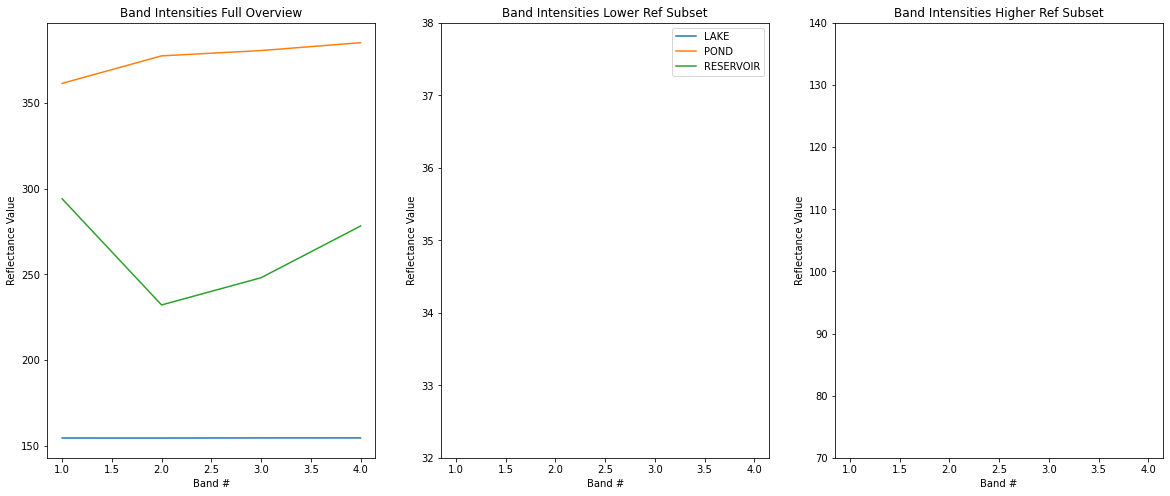

In [170]:
fig, ax = plt.subplots(1,3, figsize=[20,8])

# numbers 1-8
band_count = np.arange(1,5)

classes = np.unique(y)
for class_type in classes:
    band_intensity = np.mean(X[y==class_type, :], axis=0)
    ax[0].plot(band_count, band_intensity, label=class_type)
    ax[1].plot(band_count, band_intensity, label=class_type)
    ax[2].plot(band_count, band_intensity, label=class_type)
# plot them as lines

# Add some axis labels
ax[0].set_xlabel('Band #')
ax[0].set_ylabel('Reflectance Value')
ax[1].set_ylabel('Reflectance Value')
ax[1].set_xlabel('Band #')
ax[2].set_ylabel('Reflectance Value')
ax[2].set_xlabel('Band #')
#ax[0].set_ylim(32,38)
ax[1].set_ylim(32,38)
ax[2].set_ylim(70,140)
#ax.set
ax[1].legend(loc="upper right")
# Add a title
ax[0].set_title('Band Intensities Full Overview')
ax[1].set_title('Band Intensities Lower Ref Subset')
ax[2].set_title('Band Intensities Higher Ref Subset')

In [171]:
def str_class_to_int(class_array):
    class_array[class_array == 'LAKE'] = 0
    class_array[class_array == 'POND'] = 1
    class_array[class_array == 'RESERVOIR'] = 2
    return(class_array.astype(int))

In [172]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

In [173]:
from rasterio.plot import show
from rasterio.plot import show_hist
from rasterio.windows import Window
from rasterio.plot import reshape_as_raster, reshape_as_image

In [174]:
with rasterio.open(img_fp) as src:
    # may need to reduce this image size if your kernel crashes, takes a lot of memory
    img = src.read()[:, 150:600, 250:1400]

# Take our full image and reshape into long 2d array (nrow * ncol, nband) for classification
print(img.shape)
reshaped_img = reshape_as_image(img)
print(reshaped_img.shape)

(4, 450, 1150)
(450, 1150, 4)


In [176]:
class_prediction = gnb.predict(reshaped_img.reshape(-1, 4))

# Reshape our classification map back into a 2D matrix so we can visualize it
class_prediction = class_prediction.reshape(reshaped_img[:, :, 0].shape)

In [177]:
class_prediction = str_class_to_int(class_prediction)

In [178]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors
    
# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict((
    (0, (48, 156, 214, 255)),   # Blue - Lake
    (1, (139,69,19, 255)),      # Brown - pond
    (2, (96, 19, 134, 255)),    # Purple - reservior
))

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v
    
index_colors = [colors[key] if key in colors else 
                (255, 255, 255, 0) for key in range(0, n+1)]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, 'Classification', n+1)

<ipython-input-185-d3aa2cd48fe6>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


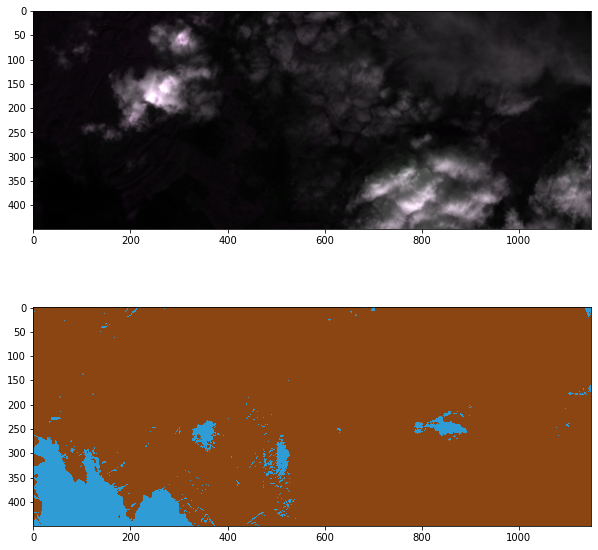

In [185]:
fig, axs = plt.subplots(2,1,figsize=(10,10))

img_stretched = color_stretch(reshaped_img, [2, 1, 2])
axs[0].imshow(img_stretched)

axs[1].imshow(class_prediction, cmap=cmap, interpolation='none')

fig.show()

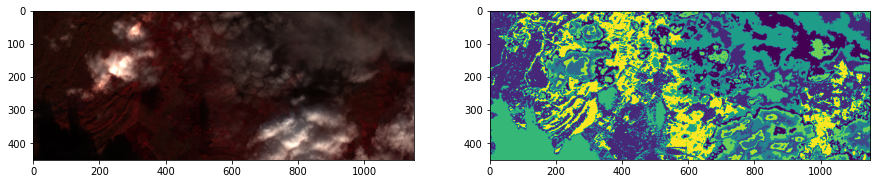

In [188]:
from sklearn.cluster import KMeans

bands, rows, cols = img.shape

k = 10 # num of clusters

kmeans_predictions = KMeans(n_clusters=k, random_state=0).fit(reshaped_img.reshape(-1, 4))

kmeans_predictions_2d = kmeans_predictions.labels_.reshape(rows, cols)

# Now show the classmap next to the image
fig, axs = plt.subplots(1,2,figsize=(15,10))

img_stretched = color_stretch(reshaped_img, [3, 2, 1])
axs[0].imshow(img_stretched)

axs[1].imshow(kmeans_predictions_2d)